<a href="https://colab.research.google.com/github/kainat-Baloch/AI_Project22/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
from fbprophet import Prophet 
from fbprophet.diagnostics import cross_validation 


In [ ]:
#importing data File
df = pd.read_csv('/content/project-data-2years.csv')
df.head() 

,ds,STOCK_PRESENT,REFILLING,y,REMAIN_STOCK
0,2019-01-01,3108,0,2628,480
1,2019-01-02,480,8000,2874,5606
2,2019-01-03,5606,0,2856,2750
3,2019-01-04,2750,0,2594,156
4,2019-01-05,156,5000,2568,2588


In [ ]:
df.shape

(731, 5)

In [ ]:
df.describe()

,STOCK_PRESENT,REFILLING,y,REMAIN_STOCK
count,731.000000,731.000000,731.000000,731.000000
mean,7641.753762,2707.655267,2627.222982,7624.444596
std,4582.707564,4673.196157,823.039280,4592.692751
min,0.000000,0.000000,0.000000,0.000000
25%,4173.500000,0.000000,2308.500000,4147.000000
50%,7082.000000,0.000000,2613.000000,7068.000000
75%,10303.500000,5000.000000,2929.000000,10303.500000
max,21989.000000,60000.000000,11138.000000,21989.000000


NameError: ignored

In [ ]:
X = df[['ds', 'y']]

In [ ]:
X

,ds,y
0,2019-01-01,2628
1,2019-01-02,2874
2,2019-01-03,2856
3,2019-01-04,2594
4,2019-01-05,2568
...,...,...
726,2020-12-27,2077
727,2020-12-28,2263
728,2020-12-29,2479
729,2020-12-30,0


In [ ]:
#asigning algorithm to Varibale Model
Model = Prophet()
Model.fit(X)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = Model.make_future_dataframe(periods=180)
future.tail()

,ds
906,2021-06-25
907,2021-06-26
908,2021-06-27
909,2021-06-28
910,2021-06-29


In [ ]:
forecast = Model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
906,2021-06-25,2751.146660,1769.760961,3742.955238
907,2021-06-26,3041.823629,2061.944069,3961.070734
908,2021-06-27,3029.519502,2161.884644,3964.201438
909,2021-06-28,3113.348375,2173.039284,4098.291350
910,2021-06-29,3302.303296,2325.766255,4238.179858


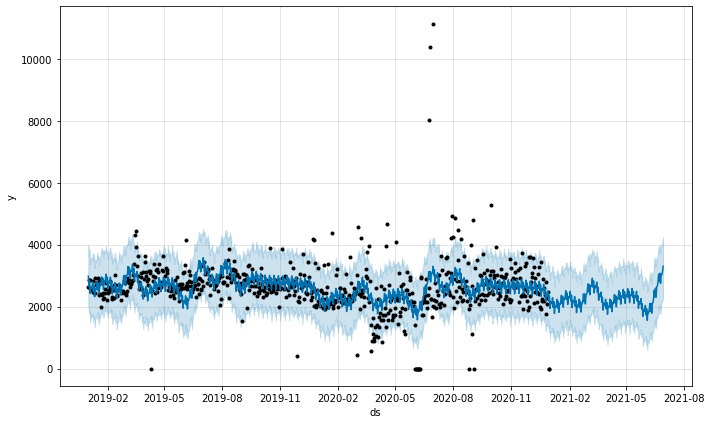

In [ ]:
fig1 = Model.plot(forecast)


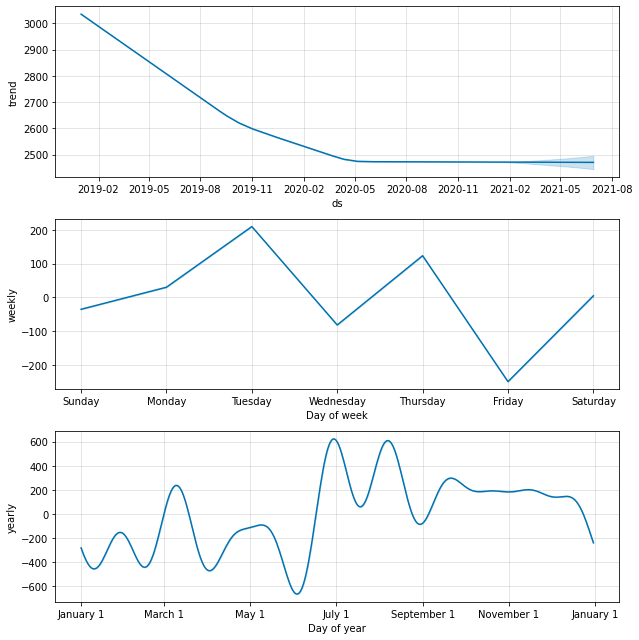

In [ ]:
fig2 = Model.plot_components(forecast)


In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(Model, forecast)

In [ ]:
plot_components_plotly(Model, forecast)
 

In [ ]:
df= cross_validation(Model, initial='500 days', period='70 days', horizon = '30 days')

INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-07-14 00:00:00 and 2020-12-01 00:00:00


In [ ]:
df.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-07-15,2190.976759,1242.903592,3189.527441,2539,2020-07-14
1,2020-07-16,2305.954997,1350.757965,3224.350046,2512,2020-07-14
2,2020-07-17,1856.551381,914.475216,2844.142423,2062,2020-07-14
3,2020-07-18,2105.261512,1142.548392,3052.530748,2675,2020-07-14
4,2020-07-19,2074.415516,1051.199191,3042.333792,2401,2020-07-14
